## Keras TensorFlow 2.0 - House Sales Prediction Regression Use Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploring the Data

In [5]:
#check for missing data

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [9]:
#the stats

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


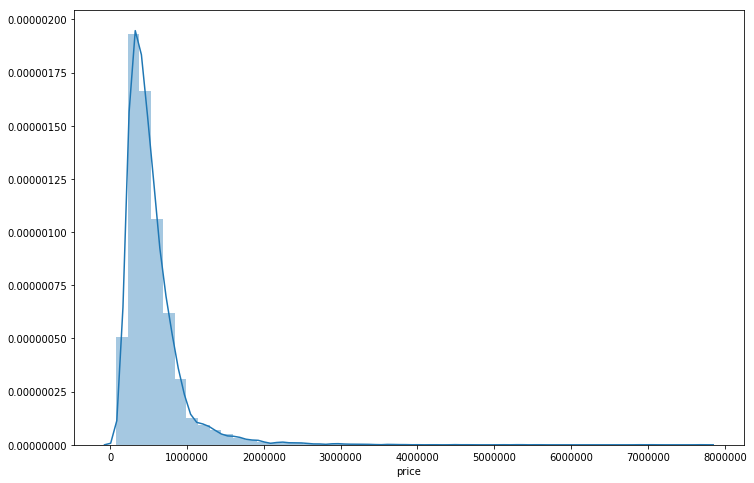

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

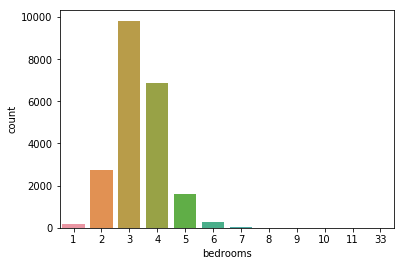

In [11]:
sns.countplot(df['bedrooms'])

#note the instance of 33 bedrooms

In [13]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [15]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

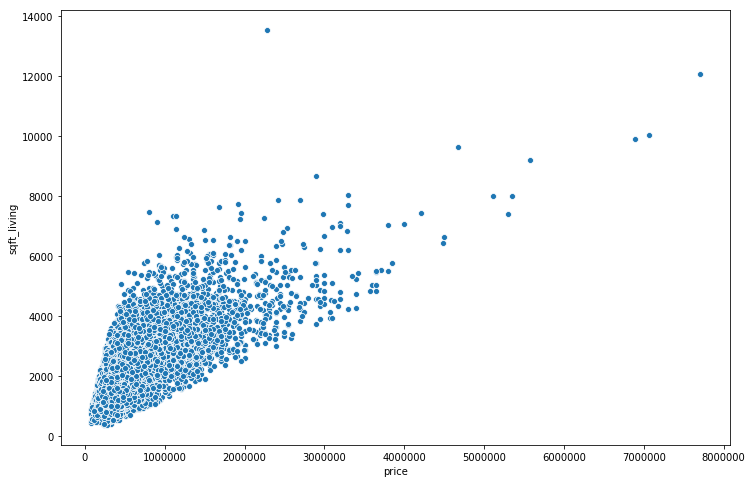

In [16]:
#Explore highly correlated features

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

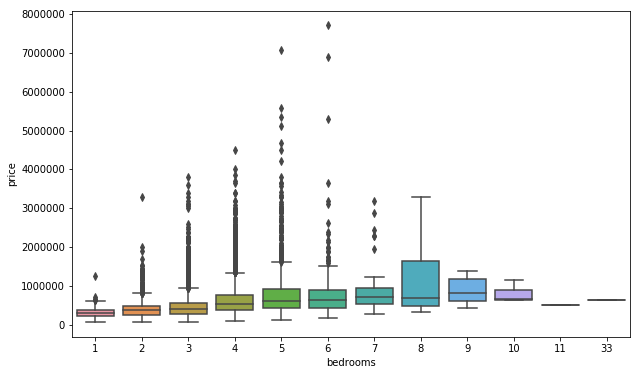

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)

### Geographical Properties

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

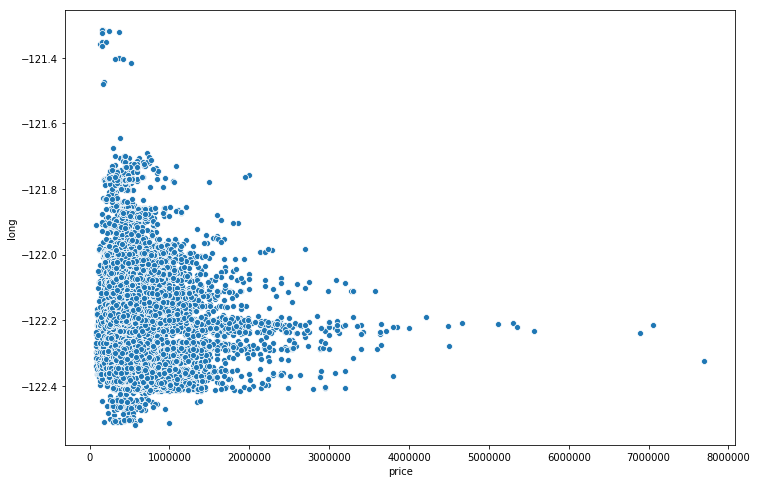

In [23]:
#longitude

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

#note: long -122.2: expensive housing area

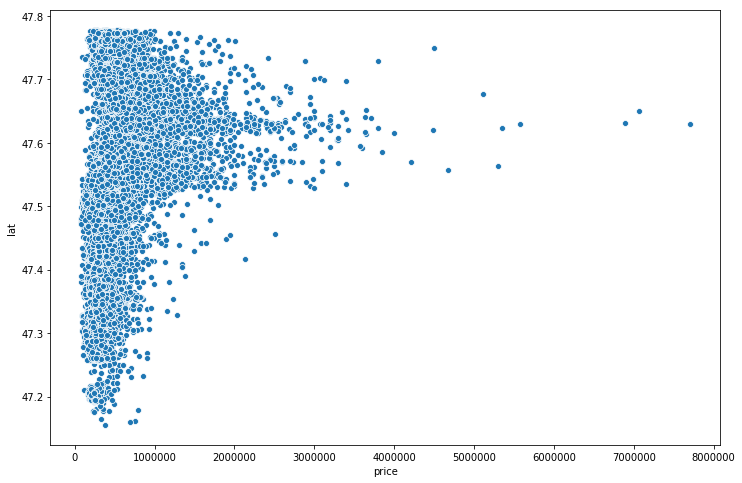

In [24]:
#latitude

plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

#note: lat around 47.6 - expensive housing

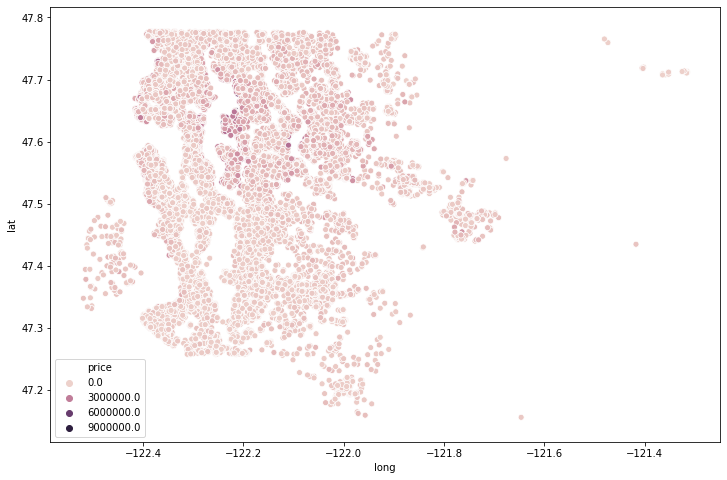

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

#note: lack of colour grading due to outliers

In [12]:
#most expensive houses

df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [25]:
len(df)

21597

In [27]:
#1% of df

len(df)*(0.01)

215.97

In [28]:
#botton 99%

non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

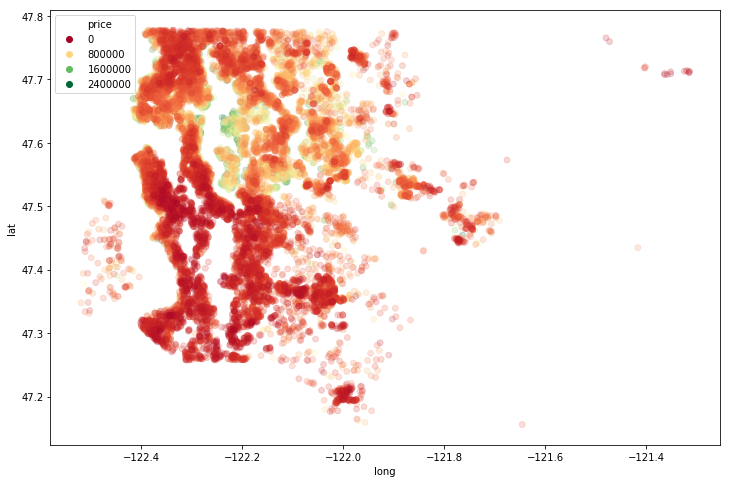

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

#note: higher contrast of house pricing

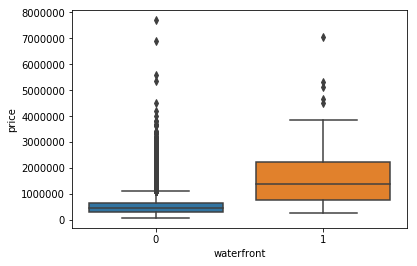

In [30]:
#check for waterfront housing

sns.boxplot(x='waterfront',y='price',data=df)

## Feature Engineering

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
#drop id

df = df.drop('id',axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [39]:
#convert date from string to datetime

df['date'] = pd.to_datetime(df['date'])

In [41]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [48]:
df['month'] = df['date'].apply(lambda date:date.month)

In [49]:
df['year'] = df['date'].apply(lambda date:date.year)

In [50]:
#FYI: lambda expression long form

# def year_extraction(date):
#     return date.year

In [52]:
df.head()

#Note: Month and Year features at end of table

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


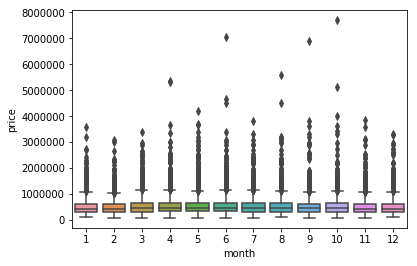

In [56]:
#compare prices by month

sns.boxplot(x='month',y='price',data=df)

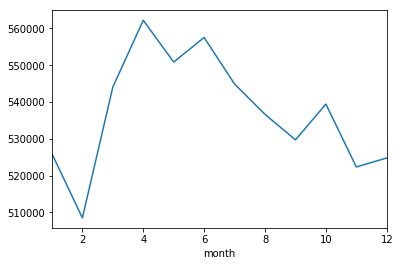

In [57]:
df.groupby('month').mean()['price'].plot()

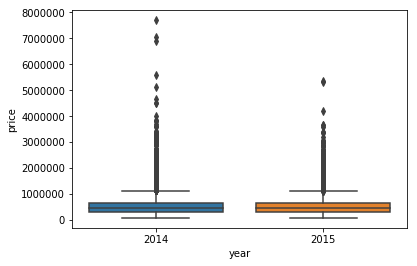

In [58]:
sns.boxplot(x='year',y='price',data=df)

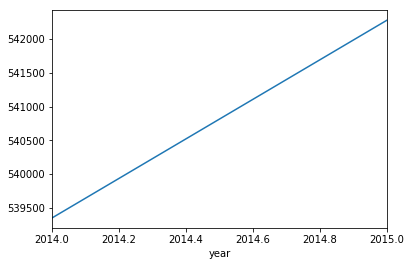

In [59]:
df.groupby('year').mean()['price'].plot()

In [60]:
#drop off origianl date column

df = df.drop('date',axis=1)

In [62]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [63]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [67]:
#See if there's a clear relation in to order of Zip code
##since they are numeric 

#is there a reason for keeping Zip as a categorical feature???
df['zipcode'].value_counts()

#Note - 70 is too many to create dummy variables for

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [68]:
#drop zip for now

df = df.drop('zipcode',axis=1)

In [69]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [72]:
df['yr_renovated'].value_counts()

#Note: most values are 0
#also, 0 is not a year


#in this case, value is ordered by year with increasing value correlated
##to the most recent year, therefor, no need to re-engineer
##otherwise, categorise based on renovated/not renovated

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [73]:
df['sqft_basement'].value_counts()

#similar case here to renovated

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [91]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()

In [96]:
#transform and fit in one step

X_train= scaler.fit_transform(X_train)

In [97]:
X_test = scaler.transform(X_test)

In [98]:
X_train.shape

(15117, 19)

In [99]:
X_test.shape

(6480, 19)

## Creating a Model with TensorFlow/Keras 

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [101]:
X_train.shape

(15117, 19)

In [102]:
#creating the deep learning network

model = Sequential()

#relu - rectified linear unit
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1)) #output

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [105]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430236762112.0000 - val_loss: 418905653248.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 429277347840.0000 - val_loss: 415750586368.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 417398521856.0000 - val_loss: 389045551104.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 360176091136.0000 - val_loss: 294454689792.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 229919113216.0000 - val_loss: 150480683008.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 119636516864.0000 - val_loss: 97616027648.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 99368058880.0000 - val_loss: 95154561024.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 97585004544.0000 - val_loss: 93734879232.0000
Epoch 9/400
119/119 [

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 33679902720.0000 - val_loss: 32266631168.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33627543552.0000 - val_loss: 32260007936.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 33618612224.0000 - val_loss: 32193937408.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 33568165888.0000 - val_loss: 32159121408.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 33540499456.0000 - val_loss: 32128468992.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 33545926656.0000 - val_loss: 32100614144.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33458806784.0000 - val_loss: 32067188736.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 33445371904.0000 - val_loss: 32126224384.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31033636864.0000 - val_loss: 29200109568.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 31028062208.0000 - val_loss: 29206790144.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 31016671232.0000 - val_loss: 29294645248.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 31015155712.0000 - val_loss: 29122541568.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 31014041600.0000 - val_loss: 29123602432.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30934595584.0000 - val_loss: 29106208768.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 30994362368.0000 - val_loss: 29066309632.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 30984056832.0000 - val_loss: 29060429824.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29837656064.0000 - val_loss: 27652431872.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29851369472.0000 - val_loss: 27668326400.0000


In [106]:
model.history.history

{'loss': [430236762112.0,
  429277347840.0,
  417398521856.0,
  360176091136.0,
  229919113216.0,
  119636516864.0,
  99368058880.0,
  97585004544.0,
  96167010304.0,
  94715092992.0,
  93182861312.0,
  91614806016.0,
  90008256512.0,
  88370790400.0,
  86622224384.0,
  84844396544.0,
  83024838656.0,
  81093795840.0,
  79107694592.0,
  77013786624.0,
  74874404864.0,
  72697323520.0,
  70486441984.0,
  68294184960.0,
  66042896384.0,
  63858683904.0,
  61770711040.0,
  59800584192.0,
  58007302144.0,
  56396115968.0,
  54998933504.0,
  53775560704.0,
  52758765568.0,
  51868393472.0,
  51126042624.0,
  50438676480.0,
  49840160768.0,
  49346609152.0,
  48827133952.0,
  48406224896.0,
  47983439872.0,
  47616638976.0,
  47217647616.0,
  46890655744.0,
  46526640128.0,
  46228111360.0,
  45926875136.0,
  45575868416.0,
  45291802624.0,
  45020209152.0,
  44747833344.0,
  44485201920.0,
  44254945280.0,
  44038651904.0,
  43813466112.0,
  43556929536.0,
  43325161472.0,
  43001790464.0,


In [109]:
pd.DataFrame(model.history.history).head()

,loss,val_loss
0,4.302368e+11,4.189057e+11
1,4.292773e+11,4.157506e+11
2,4.173985e+11,3.890456e+11
3,3.601761e+11,2.944547e+11
4,2.299191e+11,1.504807e+11


In [110]:
losses = pd.DataFrame(model.history.history)

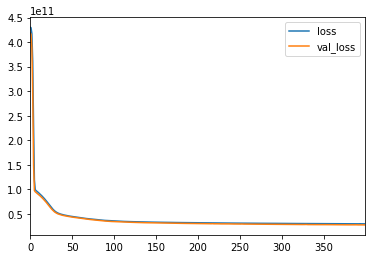

In [111]:
#loss on training Vs validation

losses.plot()

#Note: can continue training without over-fitting to the training data
##till the val_loss starts to increase

# Evaluating Test Data

In [112]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [114]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [124]:
predictions = model.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test,predictions))

166337.99276998956

In [126]:
mean_absolute_error(y_test,predictions)

103468.89555664062

In [131]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [132]:
df['price'].mean()

540296.5735055795

In [133]:
5.402966e+05

#Note mean absolute error is 103468
##off by around 20%
## NOT great!!

540296.6

In [134]:
df['price'].median()

450000.0

In [135]:
#how much variance is being explained by the model

explained_variance_score(y_test,predictions)

0.7915192613461131

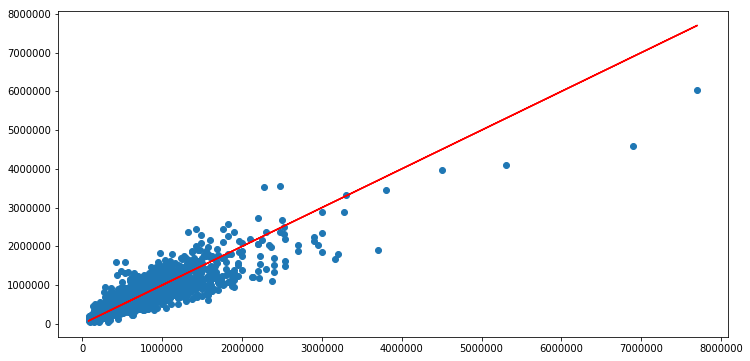

In [138]:
plt.figure(figsize=(12,6))

#predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

#note: model is being punished for having outliers

In [141]:
errors = y_test.reshape(6480, 1) - predictions

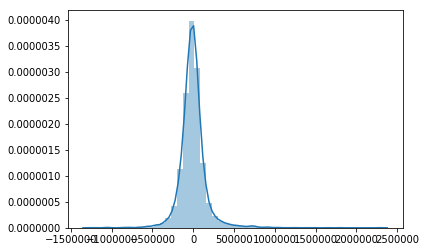

In [142]:
sns.distplot(errors)

### Predictions on a brand new house

In [143]:
df.drop('price',axis=1).iloc[0]

#these are the features of a new house in order to predict the price
##of a new house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [144]:
single_house = df.drop('price',axis=1).iloc[0]

In [147]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  1.00000e+01,  2.01400e+03])

In [154]:
#scaled version of single house (new house)

single_house = scaler.transform(single_house.reshape(-1, 19))

In [155]:
single_house

array([[-1.08000000e-01, -9.07520000e-02, -3.82666240e-02,
        -3.14991538e-04, -5.60000000e-01,  0.00000000e+00,
         0.00000000e+00, -2.81250000e-01, -3.26000000e-01,
        -4.92742015e-02,  0.00000000e+00, -1.66653703e+01,
         0.00000000e+00, -1.96375387e+02,  1.86428326e+02,
        -6.86746920e-02, -7.68538215e-04, -9.24117205e-02,
        -4.02800000e+03]])

In [156]:
model.predict(single_house)

array([[11943381.]], dtype=float32)

In [160]:
df.head(1)

#Note: predicted price was: [11943381.]
##actual price: 221900.0

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014


In [161]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [ ]:
#this model explains around 80% of the variance of house pricing

#To Do: retrain the model by dropping out the top 1-2% values and 
##see if there's a reduction on the mean squared error on the data set.